In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

In [52]:
t = md.load('/home/adria/perdiux/electro_test/traj100.dcd', top='/home/adria/perdiux/electro_test/topo.pdb')

In [53]:
t

<mdtraj.Trajectory with 100 frames, 448 atoms, 448 residues, and unitcells at 0x7f7af3b64b50>

In [51]:
t[:100].save_xtc('/home/adria/perdiux/electro_test/traj100.xtc')
t[:100].save_dcd('/home/adria/perdiux/electro_test/traj100.dcd')

In [50]:
np.genfromtxt('/home/adria/perdiux/electro_test/log_3.lammps', skip_header=True)[:,0]

array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
        70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
       140000., 150000., 160000., 170000., 180000., 190000., 200000.,
       210000., 220000., 230000., 240000., 250000., 260000., 270000.,
       280000., 290000., 300000., 310000., 320000., 330000., 340000.,
       350000., 360000., 370000., 380000., 390000., 400000., 410000.,
       420000., 430000., 440000., 450000., 460000., 470000., 480000.,
       490000., 500000., 510000., 520000., 530000., 540000., 550000.,
       560000., 570000., 580000., 590000., 600000., 610000., 620000.,
       630000., 640000., 650000., 660000., 670000., 680000., 690000.,
       700000., 710000., 720000., 730000., 740000., 750000., 760000.,
       770000., 780000., 790000., 800000., 810000., 820000., 830000.,
       840000., 850000., 860000., 870000., 880000., 890000., 900000.,
       910000., 920000., 930000., 940000., 950000., 960000., 970000.,
       980000., 9900

## Summary

**[1. HPS Model](#1)**

**[2. HPS-T Model](#2)**

**[3. Reweighting of eps-lambd](#3)**

T-RANGE = 280->400

In [5]:
temperatures = np.linspace(280,400,8)

### 1. HPS Model <a id='1'></a>

In [7]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS/WT',
                  protein='CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS',
                  save=10000,
                  t=int(1e9),
                  processors=3,
                  host="@perdiu32").write_hps_files()

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS/D4',
                  protein='CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS',
                  save=10000,
                  processors=3,
                  t=int(1e9),
                  host="@perdiu30").write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS/WT for CPEB4     ║
║---------------------------------------------------------------------------------------║
║   PARAMETERS                                                                          ║
║       - Model = HPS                                                                   ║
║       - Chains = 1                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                     ║
║       - Medium Permittivity = 80.0                                                    ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                               ║
╚════════════════════════════════════════════════

In [8]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS/7D_WT',
                  protein='7D_CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS',
                  save=10000,
                  t=int(1e9),
                  processors=3,
                  host="@perdiu25").write_hps_files()

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS/12D_D4',
                  protein='12D_CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS',
                  save=10000,
                  processors=3,
                  t=int(1e9),
                  host="@perdiu27").write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS/7D_WT for 7D_CPEB4     ║
║---------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                ║
║       - Model = HPS                                                                         ║
║       - Chains = 1                                                                          ║
║       - Ionic Strength (mM) = 0.1                                                           ║
║       - Medium Permittivity = 80.0                                                          ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                                  

In [49]:
wt = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/WT', every=2)
d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/D4', every=2)
d7 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/7D_WT', every=2)
d12 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/12D_D4', every=2)

> Run Completed at 78.41% for CPEB4_alpha. Ran 784120000 steps for a total of 78413 frames 
> Taking frames every 2 for a total of [39734, 39066, 46200, 49851, 49851, 49851, 49851, 49851] to avoid strong correlations
> Run Completed at 73.43% for CPEB4_D4. Ran 734330000 steps for a total of 73434 frames 
> Taking frames every 2 for a total of [36569, 38488, 41476, 44108, 49851, 49851, 49851, 49851] to avoid strong correlations
> Run Completed at 70.50% for 7D_CPEB4. Ran 704980000 steps for a total of 70499 frames 
> Taking frames every 2 for a total of [35102, 36768, 36829, 44241, 49851, 49851, 49851, 49851] to avoid strong correlations
> Run Completed at 68.80% for 12D_CPEB4_D4. Ran 688010000 steps for a total of 68802 frames 
> Taking frames every 2 for a total of [34255, 36853, 40038, 43166, 49851, 49851, 49851, 49851] to avoid strong correlations


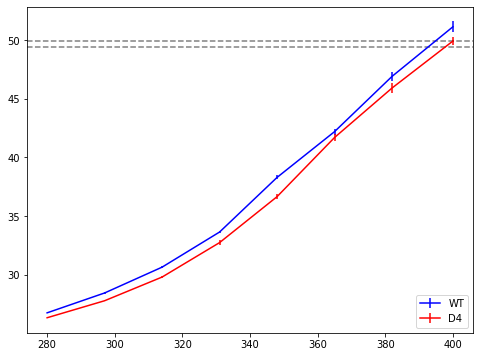

In [50]:
plt.figure(figsize=(8,6))
rg = wt.rg()
plt.errorbar(wt.temperatures, rg[0], yerr=rg[1], label='WT', color='blue')
rg = d4.rg()
plt.errorbar(d4.temperatures, rg[0], yerr=rg[1], label='D4', color='red')
plt.axhline(wt.dig_rg(), ls='--', color='black', alpha=0.5)
plt.axhline(d4.dig_rg(), ls='--', color='black', alpha=0.5)
plt.legend()

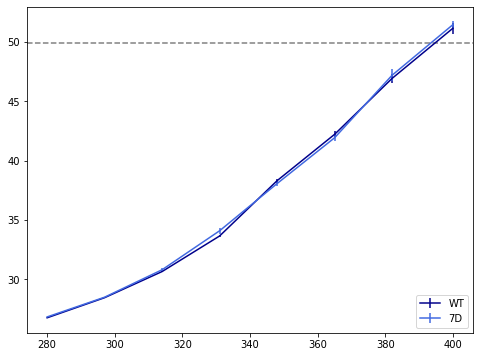

In [51]:
plt.figure(figsize=(8,6))
rg = wt.rg()
plt.errorbar(wt.temperatures, rg[0], yerr=rg[1], label='WT', color='darkblue')
rg = d7.rg()
plt.errorbar(d7.temperatures, rg[0], yerr=rg[1], label='7D', color='royalblue')
plt.axhline(wt.dig_rg(), ls='--', color='black', alpha=0.5)
plt.legend()

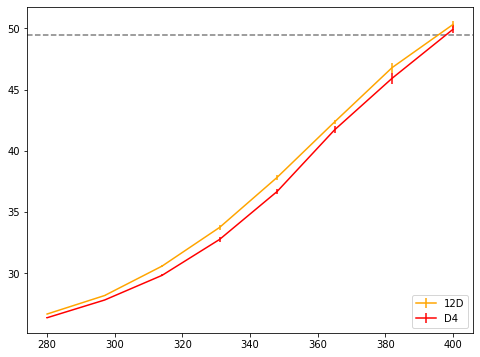

In [52]:
plt.figure(figsize=(8,6))
rg = d12.rg()
plt.errorbar(d12.temperatures, rg[0], yerr=rg[1], label='12D', color='orange')
rg = d4.rg()
plt.axhline(d4.dig_rg(), ls='--', color='black', alpha=0.5)
plt.errorbar(d4.temperatures, rg[0], yerr=rg[1], label='D4', color='red')
plt.legend()

### 2. HPS-T Model <a id='2'></a>

#### OLD DATA

In [10]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/WT')
wt_1.rg()
d4_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/D4')
d4_1.rg()
d7_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/7D_WT')
d7_1.rg()
d12_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/12D_D4')
d12_1.rg()

> Run Completed at 41.44% for CPEB4_alpha. Ran 414400000 steps for a total of 41441 frames 
> Taking frames every None for a total of [52568, 45400, 42566, 41163, 41424, 42574, 47335, 60391] to avoid strong correlations
> Run Completed at 27.51% for CPEB4_D4. Ran 275120000 steps for a total of 27513 frames 
> Taking frames every None for a total of [38020, 33907, 31223, 28132, 27228, 27747, 33204, 40248] to avoid strong correlations
> Run Completed at 25.60% for 7D_CPEB4. Ran 256030000 steps for a total of 25604 frames 
> Taking frames every None for a total of [33422, 30036, 27586, 25315, 28593, 30253, 32087, 41581] to avoid strong correlations
> Run Completed at 28.79% for 12D_CPEB4_D4. Ran 287910000 steps for a total of 28792 frames 
> Taking frames every None for a total of [37684, 32089, 28752, 28505, 38101, 39872, 43836, 55927] to avoid strong correlations


(array([32.29756633, 28.33784668, 26.35503792, 25.68818493, 25.89517573,
        26.765542  , 29.11697705, 36.31896036]),
 array([0.11335919, 0.06735984, 0.03160798, 0.02747944, 0.03646744,
        0.03681166, 0.02963239, 0.29707934]))

<ErrorbarContainer object of 3 artists>

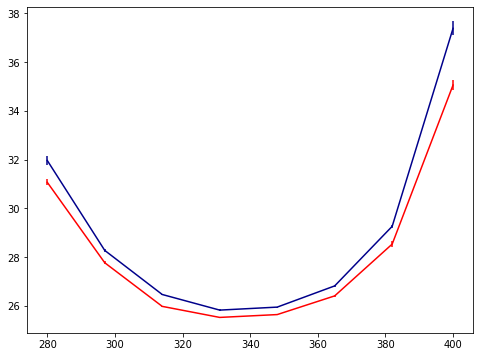

In [11]:
plt.figure(figsize=(8,6))
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=WT_COL, label='WT')
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=D4_COL, label='D4')

<ErrorbarContainer object of 3 artists>

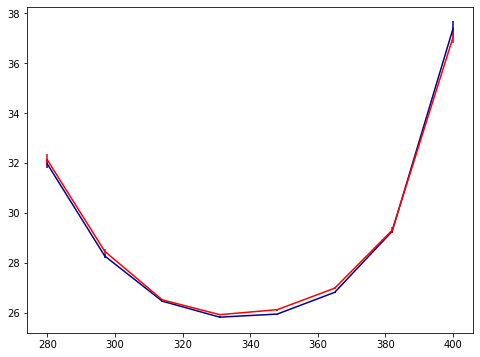

In [12]:
plt.figure(figsize=(8,6))
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=WT_COL, label='WT')
plt.errorbar(d7_1.temperatures, d7_1.c_rg[0], yerr=d7_1.c_rg[1], color=D4_COL, label='D7')

<ErrorbarContainer object of 3 artists>

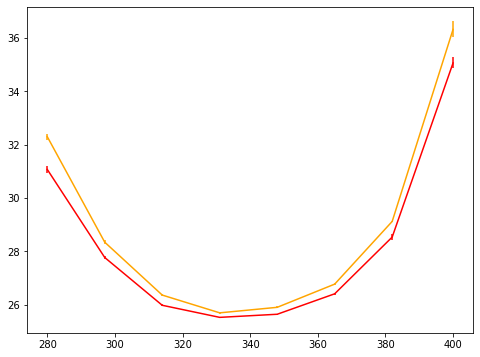

In [13]:
plt.figure(figsize=(8,6))
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=D4_COL, label='D4')
plt.errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], color=D12_COL, label='12D')

In [28]:
# 0.75
wt_075 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/WT')
wt_075.rg()
d4_075 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/D4')
d4_075.rg()
d7_075 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/7D_WT')
d7_075.rg()
d12_075 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/12D_D4')
d12_075.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every None for a total of [19701, 19701, 19701, 19701, 19701, 19701, 19701, 19701] to avoid strong correlations
> Run Completed at 90.00% for CPEB4_D4. Ran 900050000 steps for a total of 18002 frames 
> Taking frames every None for a total of [19701, 19701, 19701, 19701, 17704, 19701, 19701, 19701] to avoid strong correlations
> Run Completed at 96.25% for 7D_CPEB4. Ran 962450000 steps for a total of 19250 frames 
> Taking frames every None for a total of [19701, 19701, 19701, 18951, 18997, 19552, 19701, 19701] to avoid strong correlations
> Run Completed at 94.22% for 12D_CPEB4_D4. Ran 942150000 steps for a total of 18844 frames 
> Taking frames every None for a total of [19701, 19701, 19701, 18545, 19701, 19482, 19701, 19701] to avoid strong correlations


(array([56.63027429, 50.71546231, 46.50185872, 43.80619748, 45.19587564,
        49.53597156, 55.1880777 , 61.74959521]),
 array([0.35742079, 0.42741063, 0.56481468, 0.25275923, 0.48843475,
        0.27993788, 0.26584864, 0.38857858]))

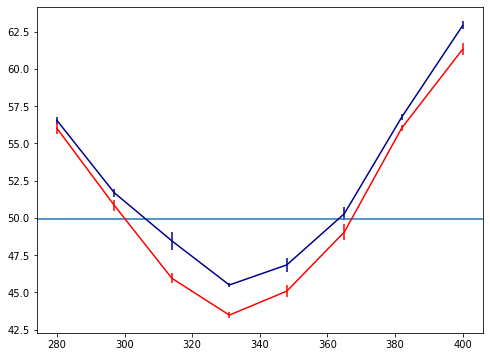

In [32]:
plt.figure(figsize=(8,6))
plt.errorbar(wt_075.temperatures, wt_075.c_rg[0], yerr=wt_075.c_rg[1], color=WT_COL, label='WT')
plt.errorbar(d4_075.temperatures, d4_075.c_rg[0], yerr=d4_075.c_rg[1], color=D4_COL, label='D4')
plt.axhline(wt_075.dig_rg())

<ErrorbarContainer object of 3 artists>

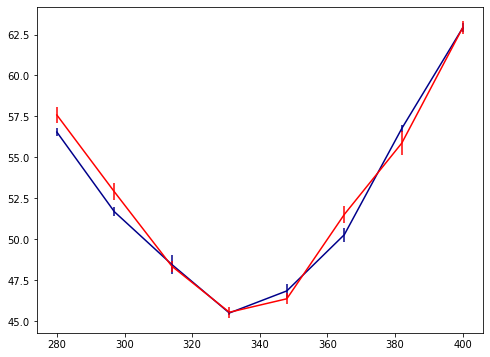

In [30]:
plt.figure(figsize=(8,6))
plt.errorbar(wt_075.temperatures, wt_075.c_rg[0], yerr=wt_075.c_rg[1], color=WT_COL, label='WT')
plt.errorbar(d7_075.temperatures, d7_075.c_rg[0], yerr=d7_075.c_rg[1], color=D4_COL, label='D7')

<ErrorbarContainer object of 3 artists>

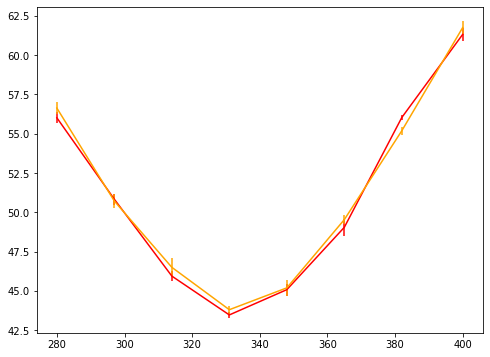

In [31]:
plt.figure(figsize=(8,6))
plt.errorbar(d4_075.temperatures, d4_075.c_rg[0], yerr=d4_075.c_rg[1], color=D4_COL, label='D4')
plt.errorbar(d12_075.temperatures, d12_075.c_rg[0], yerr=d12_075.c_rg[1], color=D12_COL, label='12D')

#### NEW DATA SETUP

In [82]:
temperatures = np.linspace(280,400,8)

In [67]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/WT',
                  protein='CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  save=10000,
                  t=int(1e9),
                  processors=4,
                  host="@perdiu46").write_hps_files()

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/D4',
                  protein='CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  save=10000,
                  processors=3,
                  t=int(1e9),
                  host="@perdiu32").write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS-T/WT for CPEB4     ║
║-----------------------------------------------------------------------------------------║
║   PARAMETERS                                                                            ║
║       - Model = HPS-T                                                                   ║
║       - Chains = 1                                                                      ║
║       - Ionic Strength (mM) = 0.1                                                       ║
║       - Medium Permittivity = 80.0                                                      ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                                 ║
╚══════════════════════════════

In [63]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/7D_WT',
                  protein='7D_CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  save=10000,
                  t=int(1e9),
                  processors=3,
                  host="@perdiu26").write_hps_files()

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/12D_D4',
                  protein='12D_CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  save=10000,
                  processors=3,
                  t=int(1e9),
                  host="@perdiu31").write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS-T/7D_WT for 7D_CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = HPS-T                                                                         ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                  

### REDUCED HPS-T

In [33]:
temperatures = np.linspace(280,400,8)

In [54]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/WT',
                  protein='CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  hps_scale=0.75,
                  save=10000,
                  t=int(1e9),
                  processors=4,
                  host="@perdiu32").write_hps_files(qsub=False, slurm=True)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/D4',
                  protein='CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  hps_scale=0.75,
                  save=10000,
                  processors=4,
                  t=int(1e9),
                  host="@perdiu30").write_hps_files(qsub=False, slurm=True)

╔══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS-T/0.75/WT for CPEB4     ║
║----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                 ║
║       - Model = HPS-T                                                                        ║
║       - Chains = 1                                                                           ║
║       - Ionic Strength (mM) = 0.1                                                            ║
║       - Medium Permittivity = 80.0                                                           ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 0.75                                                         

In [55]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/7D_WT',
                  protein='7D_CPEB4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  hps_scale=0.75,
                  save=10000,
                  t=int(1e9),
                  processors=4,
                  host="@perdiu25").write_hps_files(qsub=False, slurm=True)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75/12D_D4',
                  protein='12D_CPEB4_D4',
                  debye=0.1,
                  temperatures=temperatures,
                  model='HPS-T',
                  hps_scale=0.75,
                  save=10000,
                  processors=4,
                  t=int(1e9),
                  host="@perdiu27").write_hps_files(qsub=False, slurm=True)

╔════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS-T/0.75/7D_WT for 7D_CPEB4     ║
║----------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                       ║
║       - Model = HPS-T                                                                              ║
║       - Chains = 1                                                                                 ║
║       - Ionic Strength (mM) = 0.1                                                                  ║
║       - Medium Permittivity = 80.0                                                                 ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 0.75         

### SLABS

In [29]:
slab_temps= [280,320,360,400]
for T in slab_temps:
    hmdsetup.HMDSetup(oliba_wd='/home/adria/irb/hoomd/WT',
                      protein='CPEB4',
                      temperature=T,
                      debye=0.1,
                      save=50000,
                      t=int(1e9),
                      chains=30,
                      slab="NPT",
                      model='HPS-T',).write_hps_files()

280 280
320 320
360 360
400 400


In [70]:
wt_s = hmd.HMD(md_dir='/home/adria/irb/hoomd/WT')

In [90]:
rho_d, rho_c = wt_s.phase_diagram()

280.0
Interfaces at  [-28.511726425682582, 28.511726425682582] [-84.70317577887381, 84.70317577887381]
320.0
Interfaces at  [-32.3597837278202, 32.3597837278202] [-75.75698277958963, 75.75698277958963]
360.0
Interfaces at  [-26.910720418438206, 26.910720418438206] [-72.72452337367696, 72.72452337367696]
400.0
Interfaces at  [-26.259983136268865, 26.259983136268865] [-86.84377105910077, 86.84377105910077]


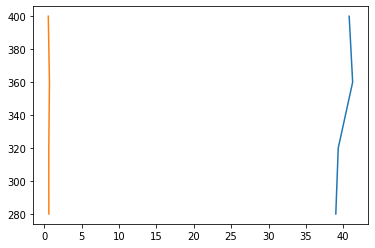

In [91]:
plt.plot(rho_c, wt_s.temperatures)
plt.plot(rho_d, wt_s.temperatures)

In [54]:
slab_temps= [280,320,360,400]
for T in slab_temps:
    hmdsetup.HMDSetup(oliba_wd='/home/adria/irb/hoomd/FINAL/red-WT',
                      protein='CPEB4',
                      temperature=T,
                      debye=0.1,
                      save=50000,
                      t=int(1e9),
                      hps_scale=0.75,
                      chains=30,
                      slab="NPT",
                      model='HPS-T',).write_hps_files()

280 280
320 320
360 360
400 400


In [13]:
slab_temps = np.linspace(280,340,4)
for T in slab_temps:
    hmdsetup.HMDSetup(oliba_wd='/home/adria/irb/hoomd/FINAL/red-08-WT',
                      protein='CPEB4',
                      temperature=T,
                      debye=0.1,
                      save=50000,
                      t=int(1e9),
                      hps_scale=0.8,
                      chains=30,
                      slab=True,
                      model='HPS-T',).write_hps_files()

280.0 280.0
300.0 300.0
320.0 320.0
340.0 340.0


In [56]:
wt_s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/red-08-WT', equil_frames=0)
rho_d, rho_c = wt_s.phase_diagram()

{'x': 990.0, 'y': 990.0, 'z': 2500.0}
280.0
Interfaces at  [-111.35322841916482, 111.35322841916482] [-189.56383869438574, 189.56383869438574]
300.0
Interfaces at  [-22.356460588320008, 22.356460588320008] [-154.25626709439027, 154.25626709439027]
320.0
Interfaces at  [-60.80068839498204, 60.80068839498204] [-120.62917562131726, 120.62917562131726]
340.0
Interfaces at  [-19.695219062100602, 19.695219062100602] [-172.2608016296037, 172.2608016296037]


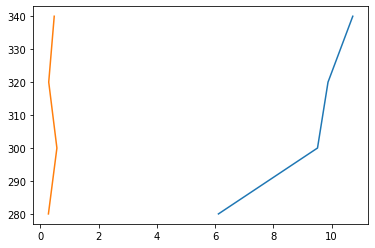

In [57]:
plt.plot(rho_c, wt_s.temperatures)
plt.plot(rho_d, wt_s.temperatures)

### 3. Reweighting of eps-lambd <a id='3'></a>

In [4]:
d12_dir = '/home/adria/perdiux/prod/lammps/final/HPS/12D_D4'
d4_dir = '/home/adria/perdiux/prod/lammps/final/HPS/D4'
d12, d4 = lmp.LMP(md_dir=d12_dir), lmp.LMP(md_dir=d4_dir)

> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


In [7]:
def n_eff_calc(weights, kish=False):
    """
    Return the effective sample size from given probabilites (weights)
    :param weights: ndarray, weights for a given run
    :param kish: ??
    :return: float, effective sample size
    """
    if kish:
        n_eff = 1. / np.sum(weights ** 2) / weights.size
    else:
        n_eff = np.exp(-np.sum(weights * np.log(weights * weights.size)))
    return n_eff

def maximize_charge(a_dir, b_dir, T, l0, eps0, method='sto', temp_dir='/home/adria/OPT',  total_frames=20000, savefile='stomin.txt', weight_cost_mean=1):
    print("RUNNING")
    x0 = np.array([l0,eps0])
    above_tc = d12
    below_tc = d4
    rgiA, rgiB = above_tc.rg(use='md')[0][T], below_tc.rg(use='md')[0][T]
    mean_rg = (rgiA + rgiB) / 2

    def rg_rerun(T, eps, ls, prot, data_dir):
        og_time = int(np.max(prot.data[T, :, 0]))
        og_save = int(prot.data[T, 1, 0])
        
        every = prot.every_frames if prot.every_frames is not None else 1
        last = prot.last_frames if prot.last_frames is not None else total_frames
        Ei = prot.data[T, :, 1]
        Ei = Ei[prot.equil_frames::every]
        Ei = Ei[-last:]
        rgi = prot.rg(use='md', full=True)[0][T]
        if prot.last_frames is None:
            rgi = rgi[-total_frames:]
        protein = prot.protein

        shutil.copyfile(os.path.join(data_dir, 'data.data'), os.path.join(temp_dir, f'data.data'))
        shutil.copyfile(os.path.join(data_dir, f'atom_traj_{T}.lammpstrj'),
                        os.path.join(temp_dir, f'atom_traj_{protein}.lammpstrj'))

        rerun = lmpsetup.LMPSetup(oliba_wd=temp_dir, protein=protein)
        rerun.water_perm = eps
        rerun.hps_scale = ls
        rerun.save = og_save
        rerun.debye_wv = 0.1
        rerun.temperatures = [above_tc.temperatures[T]]
        rerun.rerun_dump = f'atom_traj_{protein}.lammpstrj'
        # in frames
        rerun.rerun_skip = every
        # in timesteps
        rerun.rerun_start = og_time + og_save - Ei.shape[0]*og_save*every
        # in timesteps
        rerun.rerun_stop = og_time
        rerun.temperature = prot.get_temperatures()[T]
        # TODO : Remove hardcoding
        rerun.box_size = {"x": 5000, "y": 5000, "z": 5000}
        rerun.write_hps_files(rerun=True, data=False, qsub=False, rst=False, silent=True)
        rerun.run(file=os.path.join(temp_dir, 'lmp0.lmp'), n_cores=1)
        rerun_analysis = lmp.LMP(md_dir=temp_dir)
        Ef = rerun_analysis.data[0, :, 1]
        weights = rerun_analysis.weights(Ei=Ei, Ef=Ef, T=prot.get_temperatures()[T])
        weights = weights / np.sum(weights)
        n_eff = n_eff_calc(weights)
        reweight_rg = np.dot(rgi, weights.T)
        return reweight_rg, n_eff

    def calc_cost(x, T):
        ls = x[0]
        eps = x[1]
        
        rw_above_rg, neff_a = rg_rerun(T=T, eps=eps, ls=ls, prot=above_tc, data_dir=a_dir)
        rw_below_rg, neff_b = rg_rerun(T=T, eps=eps, ls=ls, prot=below_tc, data_dir=b_dir)
        global rw_A
        global rw_B
        rw_A, rw_B = rw_above_rg, rw_below_rg
        c = - (rw_above_rg - rw_below_rg) ** 2 + weight_cost_mean * ((rw_below_rg + rw_above_rg) / 2 - mean_rg) ** 2
        print("=" * 80)
        print(f"ls={ls}, eps={eps}, RgA_i={rgiA}, RgB_i={rgiB}")
        print(f"Rw RgA, {rw_A:.3f}, Rw RgB {rw_B:.3f}, diff {rw_A - rw_B:.2f}, dist to mean {(rw_below_rg + rw_above_rg) / 2 - mean_rg:.2f}, cost {c:.2f}")
        print(f"Neff-A, {neff_a} Neff-B, {neff_b}")
        print("=" * 80)
        if method=='opt':
            return c
        else:
            return c, neff_a, neff_b
    

    if method == 'opt':
        cons_all = ({'type':'ineq', 'fun': lambda x:  1 - x[0]   },
                   {'type':'ineq', 'fun': lambda x:  x[0] - 0.5 })
        m = scipy.optimize.minimize(fun=calc_cost, x0=np.array(x0), method="COBYLA", constraints=cons_all, args=(T,))

        print("=" * 80)
        print(
            f"For T={T} and initial parameters I = {I0}, eps = {eps0} with RgA = {above_tc.rg(use='md').mean(axis=1)[T]:.2f}, RgB = {below_tc.rg(use='md').mean(axis=1)[T]:.2f}")
        print(f"Minimization resulted in {m.x[0]}  {m.x[1]} and reweighted Rg's A = {rw_A:.2f} and B = {rw_B:.2f}")
        print("=" * 80)
        result = "=============================================\n"
        result += f'T={T}, I0={I0}, eps={eps0}, rgiAbove={rgiA}, rgiBelow={rgiB} \n'
        result += f'If={m.x[0]}, eps={m.x[1]}, rgAboveF={rw_A}, rgBelowF={rw_B}\n'
        result += "=============================================\n"
        with open(f'minimization_{T}.txt', 'a+') as min:
            min.write(result)

        return m
    elif method == 'sto':
        best, best_params, best_neffs = 0, [], [-1, -1]
        iterations = 50000
        for it in range(iterations):
            current = []
            for x in x0:
                current.append(x * np.random.normal(1, 0.02, 1)[0])
            cst, neff_a, neff_b = calc_cost(current, args=(T,))
            if cst < best:
                best = cst
                best_params = current[:]
                best_neffs = [neff_a, neff_b]
                print("Saving at /home/adria/rew_test.txt", f'data/{savefile}')
                with open('/home/adria/rew_test.txt', 'a+') as fout:
                    str_curr = ", ".join(map(str,current))
                    fout.write(
                        f"{it} {cst} {rw_A} {rw_B} {str_curr} {neff_a} {neff_b}\n")
                x0 = current
        return best, best_params, best_neffs

In [9]:
maximize_charge(a_dir=d12_dir, b_dir=d4_dir, T=0, l0=1, eps0=80, method='opt')

RUNNING


KeyboardInterrupt: 

In [38]:
d12.rg()[0][0]

26.6438862726664

In [39]:
d4.rg()[0][0]

26.329914129104985

In [52]:
initial[0,:,1]

array([127.99502 ,  50.900432,  55.707637, ...,  77.041855,  67.054605,
        59.478386])

def n_eff_calc(weights, kish=False):
    """
    Return the effective sample size from given probabilites (weights)
    :param weights: ndarray, weights for a given run
    :param kish: ??
    :return: float, effective sample size
    """
    if kish:
        n_eff = 1. / np.sum(weights ** 2) / weights.size
    else:
        n_eff = np.exp(-np.sum(weights * np.log(weights * weights.size)))
    return n_eff

def maximize_charge(a_dir, b_dir, T, method='sto', temp_dir='/home/adria/OPT',
                    I0=None, l0=None, eps0=None, total_frames=1000, savefile='stomin.txt', weight_cost_mean=1):
    print("RUNNING")
    default = {"I": 100e-3, "ls": 1.0, "eps": 80.0}
    above_tc = d12
    below_tc = d4
    rgiA, rgiB = above_tc.rg(use='md')[0][T], below_tc.rg(use='md')[0][T]
    mean_rg = (rgiA + rgiB) / 2
    x0, x0_dict, args, args_dict = [], {}, [], {}
    if I0 is not None:
        x0.append(I0)
        x0_dict["I"] = len(x0) - 1
    if l0 is not None:
        x0.append(l0)
        x0_dict["ls"] = len(x0) - 1
    if eps0 is not None:
        x0.append(eps0)
        x0_dict["eps"] = len(x0) - 1

    def rg_rerun(T, eps, I, ls, protein_object, data_dir):
        og_time = int(np.max(protein_object.data[T, :, 0]))
        og_save = int(protein_object.data[T, 1, 0])
        
        every = protein_object.every_frames if protein_object.every_frames is not None else 1
        last = protein_object.last_frames if protein_object.last_frames is not None else total_frames
        
        Ei = protein_object.data[T, :, 1]
        Ei = Ei[protein_object.equil_frames::every]
        Ei = Ei[-last:]
        rgi = protein_object.rg(use='md', full=True)[0][T]
        if protein_object.last_frames is None:
            rgi = rgi[-total_frames:]
        protein = protein_object.protein

        shutil.copyfile(os.path.join(data_dir, 'data.data'), os.path.join(temp_dir, f'data.data'))
        shutil.copyfile(os.path.join(data_dir, f'atom_traj_{T}.lammpstrj'),
                        os.path.join(temp_dir, f'atom_traj_{protein}.lammpstrj'))

        rerun = lmpsetup.LMPSetup(oliba_wd=temp_dir, protein=protein)
        # rerun.ionic_strength = I
        rerun.water_perm = eps
        rerun.hps_scale = ls
        rerun.save = og_save
        rerun.debye = 0.1
        rerun.temperatures = [above_tc.temperatures[T]]
        rerun.rerun_dump = f'atom_traj_{protein}.lammpstrj'
        # in frames
        rerun.rerun_skip = every
        # in timesteps
        rerun.rerun_start = og_time + og_save - Ei.shape[0]*og_save*every
        # in timesteps
        rerun.rerun_stop = og_time
        rerun.temperature = protein_object.get_temperatures()[T]
        # TODO : Remove hardcoding
        rerun.box_size = {"x": 5000, "y": 5000, "z": 5000}
        rerun.write_hps_files(rerun=True, data=False, qsub=False, rst=False, silent=True)
        rerun.run(file=os.path.join(temp_dir, 'lmp0.lmp'), n_cores=1)

        rerun_analysis = lmp.LMP(md_dir=temp_dir)
        Ef = rerun_analysis.data[0, :, 1]
        weights = rerun_analysis.weights(Ei=Ei, Ef=Ef, T=protein_object.get_temperatures()[T])
        weights = weights / np.sum(weights)
        n_eff = n_eff_calc(weights)
        reweight_rg = np.dot(rgi, weights.T)
        return reweight_rg, n_eff

    def calc_cost(x, args):
        T = args[0]
        if "I" in x0_dict:
            I = x[x0_dict["I"]]
        else:
            I = default["I"]
        if "ls" in x0_dict:
            ls = x[x0_dict["ls"]]
        else:
            ls = default["ls"]
        if "eps" in x0_dict:
            eps = x[x0_dict["eps"]]
        else:
            eps = default["eps"]
        print(ls, eps)
        rw_above_rg, neff_a = rg_rerun(T=T, eps=eps, I=I, ls=ls, protein_object=above_tc, data_dir=a_dir)
        rw_below_rg, neff_b = rg_rerun(T=T, eps=eps, I=I, ls=ls, protein_object=below_tc, data_dir=b_dir)
        global rw_A
        global rw_B
        rw_A, rw_B = rw_above_rg, rw_below_rg
        c = - (rw_above_rg - rw_below_rg) ** 2 + weight_cost_mean * ((rw_below_rg + rw_above_rg) / 2 - mean_rg) ** 2
        print("=" * 80)
        print(f"I={I}, ls={ls}, eps={eps}, RgA_i={rgiA}, RgB_i={rgiB}")
        print(
            f"Rw RgA, {rw_A:.3f}, Rw RgB {rw_B:.3f}, diff {rw_A - rw_B:.2f}, dist to mean {(rw_below_rg + rw_above_rg) / 2 - mean_rg:.2f}, cost {c:.2f}")
        print(f"Neff-A, {neff_a} Neff-B, {neff_b}")
        print("=" * 80)
        return c, neff_a, neff_b
    cst, neff_a, neff_b = calc_cost([100e-3, 1, 80], args=[T, 100e-3, 1, 80])
    return cst, neff_a, neff_b
    if method == 'opt':
        m = scipy.optimize.minimize(fun=calc_cost, x0=np.array(x0),
                                    args=[T, default["I"], default["ls"], default["eps"]])

        print("=" * 80)
        print(
            f"For T={T} and initial parameters I = {I0}, eps = {eps0} with RgA = {above_tc.rg(use='md').mean(axis=1)[T]:.2f}, RgB = {below_tc.rg(use='md').mean(axis=1)[T]:.2f}")
        print(f"Minimization resulted in {m.x[0]}  {m.x[1]} and reweighted Rg's A = {rw_A:.2f} and B = {rw_B:.2f}")
        print("=" * 80)
        result = "=============================================\n"
        result += f'T={T}, I0={I0}, eps={eps0}, rgiAbove={rgiA}, rgiBelow={rgiB} \n'
        result += f'If={m.x[0]}, eps={m.x[1]}, rgAboveF={rw_A}, rgBelowF={rw_B}\n'
        result += "=============================================\n"
        with open(f'minimization_{T}.txt', 'a+') as min:
            min.write(result)

        return m
    elif method == 'sto':
        best, best_params, best_neffs = 0, [], [-1, -1]
        iterations = 50000
        for it in range(iterations):
            current = []
            for x in x0:
                current.append(x * np.random.normal(1, 0.02, 1)[0])
            cst, neff_a, neff_b = calc_cost(current, args=[T, default["I"], default["ls"], default["eps"]])
            if cst < best:
                best = cst
                best_params = current[:]
                best_neffs = [neff_a, neff_b]
                print(current)
                print("Saving at /home/adria/rew_test.txt", f'data/{savefile}')
                with open('/home/adria/rew_test.txt', 'a+') as fout:
                    str_curr = ", ".join(map(str,current))
                    fout.write(
                        f"{it} {cst} {rw_A} {rw_B} {str_curr} {neff_a} {neff_b}\n")
                x0 = current
        return best, best_params, best_neffs